In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from scipy.stats import norm

In [ ]:
import shutil

# Chemin du répertoire cloné
repo_path = "/content/DataProjetZZ3/"

# Supprimer le répertoire
try:
    shutil.rmtree(repo_path)
    print(f"Le répertoire {repo_path} a été supprimé avec succès.")
except OSError as e:
    print(f"Erreur lors de la suppression du répertoire {repo_path}: {e}")

Le répertoire /content/DataProjetZZ3/ a été supprimé avec succès.


In [ ]:
! git clone "https://gitlab.isima.fr/clkarinthi/DataProjetZZ3.git"

Cloning into 'DataProjetZZ3'...
remote: Enumerating objects: 25, done.
remote: Total 25 (delta 0), reused 0 (delta 0), pack-reused 25
Receiving objects: 100% (25/25), 26.13 MiB | 552.00 KiB/s, done.
Resolving deltas: 100% (5/5), done.
Updating files: 100% (6/6), done.


In [ ]:
data_path: str = "/content/DataProjetZZ3/Data"

---------DATA LOADING---------
Vitesses [1 7 4 1 1 6 9 7 9 6 9 3 1 5 8 0 2 0 2 3 3 3 2]


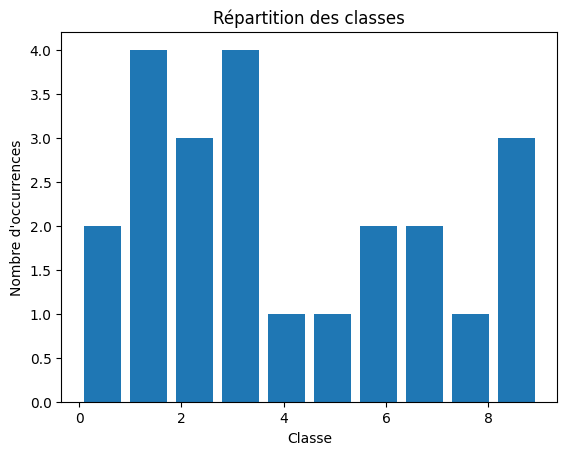

[[0.1  0.7  0.1  0.05 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.05 0.1  0.7  0.1  0.05]
 [0.   0.   0.05 0.1  0.7  0.1  0.05 0.   0.   0.  ]
 [0.1  0.7  0.1  0.05 0.   0.   0.   0.   0.   0.  ]
 [0.1  0.7  0.1  0.05 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.05 0.1  0.7  0.1  0.05 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.05 0.1  0.7 ]
 [0.   0.   0.   0.   0.   0.05 0.1  0.7  0.1  0.05]
 [0.   0.   0.   0.   0.   0.   0.   0.05 0.1  0.7 ]
 [0.   0.   0.   0.   0.05 0.1  0.7  0.1  0.05 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.05 0.1  0.7 ]
 [0.   0.05 0.1  0.7  0.1  0.05 0.   0.   0.   0.  ]
 [0.1  0.7  0.1  0.05 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.05 0.1  0.7  0.1  0.05 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.05 0.1  0.7  0.1 ]
 [0.7  0.1  0.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.05 0.1  0.7  0.1  0.05 0.   0.   0.   0.   0.  ]
 [0.7  0.1  0.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.05 0.1  0.7  0.1  0.05 0.   0.   0.   0.  

In [ ]:
taille_carré = 50

print('---------DATA LOADING---------')
x_train = np.load(data_path + '/x_train_Alpine.npy' )
y_train = np.load(data_path + '/y_train_Alpine.npy')
#x_train = np.load(data_path + '/x_train_Salmon.npy' )
#y_train = np.load(data_path + '/y_train_Salmon.npy')

#print(np.shape(x_train))
#print(np.shape(x_train_Alp))


#x_train = np.concatenate((x_train, x_train_Sal), axis=0)
#y_train = np.concatenate((y_train, y_train_Sal), axis=0)

y_train = y_train[:, 1].reshape(-1)

# Nombre de classes
num_classes = 10
max = np.max(y_train)
min = np.min(y_train)

# Normalize y_train to be between 0 and 2
normalized_y_train = y_train /(max-min)

# Map the normalized values to class indices
y_train = np.clip(np.floor(normalized_y_train * num_classes), 0, num_classes - 1).astype(int)


print(f"Vitesses {y_train}")

# Créer un histogramme des indices de classe
plt.hist(y_train, bins=num_classes, align='mid', rwidth=0.8)

# Ajouter des étiquettes et un titre
plt.xlabel('Classe')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des classes')

# Afficher l'histogramme
plt.show()

y_train = tf.keras.utils.to_categorical(y_train)
y = np.zeros_like(y_train, dtype=float)

for i in range(y_train.shape[0]):
    for j in range(y_train.shape[1]):
        if y_train[i, j] == 1:
              y[i, j] = 0.7
              if j-1 >= 0:
                y[i,j-1] = 0.1
              if j+1 <= 9:
                y[i,j+1] = 0.1
              if j-2 >= 0:
                y[i,j-2] = 0.05
              if j+2 <= 9:
                y[i,j+2] = 0.05

print(y)
x_train, x_test, y_train, y_test = train_test_split(x_train, y, test_size=0.2, random_state=31)

print(np.shape(x_train))
print(np.shape(y_train))


In [ ]:
from tensorflow.keras.applications import MobileNetV3Small

from tensorflow.keras.layers import Input, Dense, Activation,Lambda,Flatten,Dropout,LSTM,TimeDistributed,SimpleRNN
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential

In [ ]:
print('---------NETWORK CREATION---------')

# CNN
cnn = Sequential()
cnn.add(Conv2D(24,(3,3), input_shape=(taille_carré, taille_carré, 3),activation = 'relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(48,(3,3),activation = 'relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(96,(3,3),activation = 'relu'))

cnn.summary()

# RNN
model = Sequential()
model.add(TimeDistributed(cnn, input_shape=(100, taille_carré, taille_carré, 3)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)


# Compile the model with appropriate loss function for regression
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_crossentropy'])
model.summary()

---------NETWORK CREATION---------
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 48, 48, 24)        672       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 24, 24, 24)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 22, 22, 48)        10416     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 11, 11, 48)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 9, 9, 96)          41568     
                                                                 
Total params: 5265

In [ ]:
print('---------TRAINING---------')
history = model.fit(x_train, y_train, batch_size = 9, epochs = 700)

---------TRAINING---------
Epoch 1/700
2/2 [==============================] - 3s 77ms/step - loss: 2.1733 - categorical_crossentropy: 2.1733
Epoch 2/700
2/2 [==============================] - 0s 78ms/step - loss: 2.1325 - categorical_crossentropy: 2.1325
Epoch 3/700
2/2 [==============================] - 0s 59ms/step - loss: 2.1477 - categorical_crossentropy: 2.1477
Epoch 4/700
2/2 [==============================] - 0s 56ms/step - loss: 2.1154 - categorical_crossentropy: 2.1154
Epoch 5/700
2/2 [==============================] - 0s 56ms/step - loss: 2.0993 - categorical_crossentropy: 2.0993
Epoch 6/700
2/2 [==============================] - 0s 51ms/step - loss: 2.0986 - categorical_crossentropy: 2.0986
Epoch 7/700
2/2 [==============================] - 0s 58ms/step - loss: 2.0919 - categorical_crossentropy: 2.0919
Epoch 8/700
2/2 [==============================] - 0s 60ms/step - loss: 2.0874 - categorical_crossentropy: 2.0874
Epoch 9/700
2/2 [==============================] - 0s 58ms/st

---------EVALUATION---------
1/1 [==============================] - 1s 550ms/step - loss: 2.1587 - categorical_crossentropy: 2.1587
Test Loss: 2.1587002277374268
Test Accuracy: 2.1587002277374268


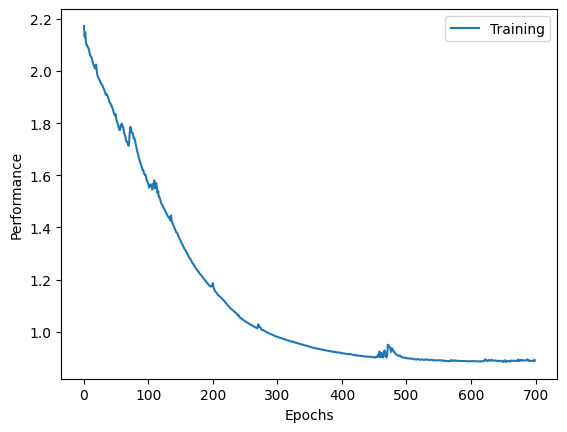

Random test video:
1/1 [==============================] - 0s 450ms/step
Vitesses prédites: [9 2 4 1 6]
Vitesses réelles [5 1 3 3 6]


In [ ]:
print('---------EVALUATION---------')
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


# Plot MAE for training and validation
plt.plot(history.history['categorical_crossentropy'], label='Training')
plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.legend()
plt.show()

print('Random test video:')
print(f'Vitesses prédites: {np.argmax(model.predict(x_test), axis=1)}')

print(f'Vitesses réelles {np.argmax(y_test, axis=1)}')




model.save("C:/Users/clemk/OneDrive/Documents/projetZZ3/Models/Salmon_200.h5")